<a href="https://colab.research.google.com/github/md-harshaprada/heart-disease-prediction-kaggleDataset/blob/main/Heart_Disease_Prediction_KaggleDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Abstract**

Heart-related diseases are the leading cause of death worldwide over the past few decades and have become the most serious illness in both India and the rest of the world. In order to automate the analysis of large and complex datasets, machine learning algorithms and techniques have been used on a variety of medical datasets. In recent years, numerous researchers have employed a variety of machine learning techniques to aid the medical community and specialists in the diagnosis of heart-related diseases.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report

In [48]:
data = pd.read_csv('/content/framingham.csv')

# **Data Pre-Processing**

In [49]:
print(f'data length: {len(data)}\n')
print(f'missing values by column:\n{data.isnull().sum()}\n')
print(f'data duplication(all columns): {data.duplicated().sum()}')

data length: 4238

missing values by column:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

data duplication(all columns): 0


In [50]:
updated_data = data
updated_data['education']=updated_data['education'].fillna(updated_data['education'].mean())
updated_data['cigsPerDay']=updated_data['cigsPerDay'].fillna(updated_data['cigsPerDay'].mean())
updated_data['BPMeds']=updated_data['BPMeds'].fillna(updated_data['BPMeds'].mean())
updated_data['totChol']=updated_data['totChol'].fillna(updated_data['totChol'].mean())
updated_data['BMI']=updated_data['BMI'].fillna(updated_data['BMI'].mean())
updated_data['heartRate']=updated_data['heartRate'].fillna(updated_data['heartRate'].mean())
updated_data['glucose']=updated_data['glucose'].fillna(updated_data['glucose'].mean())
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [51]:
print(f'data length: {len(updated_data)}\n')
print(f'missing values by column:\n{updated_data.isnull().sum()}\n')
print(f'data duplication(all columns): {updated_data.duplicated().sum()}')

data length: 4238

missing values by column:
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

data duplication(all columns): 0


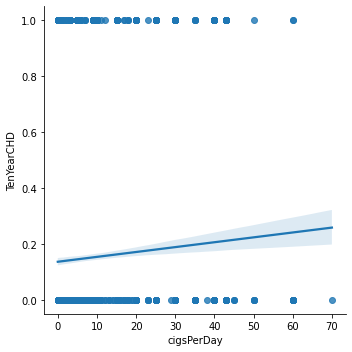

In [52]:
cig = sns.lmplot(x="cigsPerDay", y="TenYearCHD", data=updated_data)

In [53]:
cormat = updated_data.corr()
round(cormat,2)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.00,-0.03,0.02,0.20,0.32,-0.05,-0.00,0.01,0.02,-0.07,-0.04,0.06,0.08,-0.12,0.01,0.09
age,-0.03,1.00,-0.16,-0.21,-0.19,0.12,0.06,0.31,0.10,0.26,0.39,0.21,0.14,-0.01,0.12,0.23
education,0.02,-0.16,1.00,0.02,0.01,-0.01,-0.04,-0.08,-0.04,-0.02,-0.13,-0.06,-0.14,-0.05,-0.03,-0.05
currentSmoker,0.20,-0.21,0.02,1.00,0.77,-0.05,-0.03,-0.10,-0.04,-0.05,-0.13,-0.11,-0.17,0.06,-0.05,0.02
cigsPerDay,0.32,-0.19,0.01,0.77,1.00,-0.05,-0.03,-0.07,-0.04,-0.03,-0.09,-0.06,-0.09,0.07,-0.06,0.06
BPMeds,-0.05,0.12,-0.01,-0.05,-0.05,1.00,0.12,0.26,0.05,0.08,0.25,0.19,0.10,0.02,0.05,0.09
prevalentStroke,-0.00,0.06,-0.04,-0.03,-0.03,0.12,1.00,0.07,0.01,0.00,0.06,0.05,0.02,-0.02,0.02,0.06
prevalentHyp,0.01,0.31,-0.08,-0.10,-0.07,0.26,0.07,1.00,0.08,0.16,0.70,0.62,0.30,0.15,0.08,0.18
diabetes,0.02,0.10,-0.04,-0.04,-0.04,0.05,0.01,0.08,1.00,0.04,0.11,0.05,0.09,0.05,0.61,0.10
totChol,-0.07,0.26,-0.02,-0.05,-0.03,0.08,0.00,0.16,0.04,1.00,0.21,0.16,0.11,0.09,0.04,0.08


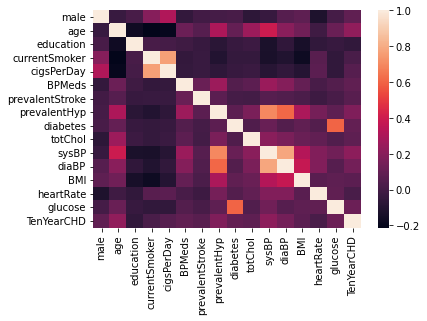

In [54]:
sns.heatmap(cormat);

In [55]:
target1=data[data['TenYearCHD']==1]
target0=data[data['TenYearCHD']==0]
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)
target=pd.concat([target0,target1])
target['TenYearCHD'].value_counts()

0    3594
1    3594
Name: TenYearCHD, dtype: int64

In [56]:
data=target
np.shape(data)

(7188, 16)

# **Train Data and Test Data Features Splitting**

In [99]:
y = data['TenYearCHD']
X = data.drop(['TenYearCHD'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)


In [101]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

# **Model Testing**
The classification algorithms used are 

1.   Logistic Regression (From Linear Models)
2.   Decision Tree Classification(From Non-Linear Models)
3.   Random Forest Classification(From Non-Linear Models)





**Logistic Regression**

One of the most widely used Machine Learning algorithms, under the category of Supervised Learning, is logistic regression. Using a predetermined set of independent variables, it is used to predict the categorical dependent variable. Logistic regression is widely used in healthcare institutions to precisely pinpoint the target individuals who are in need of the health plan.

Accuracy = 67.13%

Confussion matrix


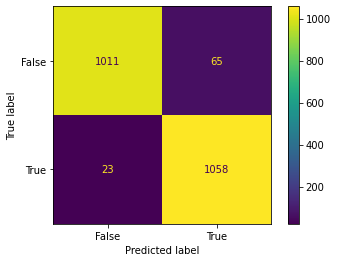



Accuracy: 67.1302735280482 %

              precision    recall  f1-score   support

           0       0.66      0.69      0.68      1076
           1       0.68      0.65      0.67      1081

    accuracy                           0.67      2157
   macro avg       0.67      0.67      0.67      2157
weighted avg       0.67      0.67      0.67      2157



In [104]:

log_reg = LogisticRegression(random_state=2, max_iter=2500)
model = log_reg.fit(train_x, train_y)
log_reg_predict = log_reg.predict(test_x)
log_reg_acc_score = accuracy_score(test_y, log_reg_predict)
print("Confussion matrix")
confusion_matrix = metrics.confusion_matrix(test_y, Random_Forest_predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
print("\n")
print("Accuracy:",log_reg_acc_score*100,'%\n')
print(classification_report(test_y,log_reg_predict))

**Decision Tree**

Decision Tree come under the supervised machine learning algorithm and can be used to solve classification and regression problems, but it is typically preferred for doing so. It is a tree-structured classifier, where internal nodes stand in for a dataset's features, branches for the decision-making process, and each leaf node for the classification result.

Accuracy = 90.68%


Confussion matrix


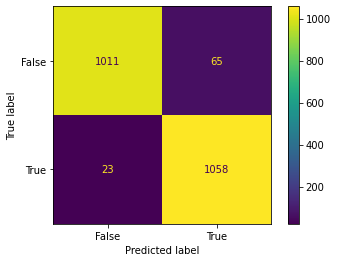



Accuracy of DecisionTreeClassifier: 90.68150208623088 %

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      1076
           1       0.85      0.99      0.91      1081

    accuracy                           0.91      2157
   macro avg       0.92      0.91      0.91      2157
weighted avg       0.92      0.91      0.91      2157



In [103]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 30)
decision_tree.fit(train_x,train_y)
decision_tree_predicted = decision_tree.predict(test_x)
decision_tree_acc_score = accuracy_score(test_y, decision_tree_predicted)
print("Confussion matrix")
confusion_matrix = metrics.confusion_matrix(test_y, Random_Forest_predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
print("\n")
print("Accuracy of DecisionTreeClassifier:",decision_tree_acc_score*100,'%\n')
print(classification_report(test_y,decision_tree_predicted))

**Random Forest**

Supervised machine learning algorithms like random forest are frequently employed in classification and regression issues. On various samples, it constructs decision trees and uses their average for classification and majority vote for regression. The Random Forest Algorithm's ability to handle data sets with both continuous variables, as in regression, and categorical variables, as in classification, is one of its most crucial features. In terms of classification issues, it delivers better results. This uses bagging and boosting techniques. High detection accuracy is provided by a large number of trees.

Accuracy = 95.92%

Confussion matrix


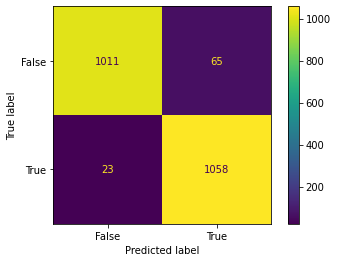



Accuracy of Random Forest: 95.92025961984237 %

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1076
           1       0.94      0.98      0.96      1081

    accuracy                           0.96      2157
   macro avg       0.96      0.96      0.96      2157
weighted avg       0.96      0.96      0.96      2157



In [102]:
from sklearn import metrics

Random_Forest = RandomForestClassifier(n_estimators=100, random_state=0,max_depth=27)
Random_Forest.fit(train_x,train_y)
Random_Forest_predicted = Random_Forest.predict(test_x)
#Random_Forest_conf_matrix = confusion_matrix(test_y, Random_Forest_predicted)
Random_Forest_acc_score = accuracy_score(test_y, Random_Forest_predicted)
print("Confussion matrix")
#print(Random_Forest_conf_matrix)
confusion_matrix = metrics.confusion_matrix(test_y, Random_Forest_predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
print("\n")
print("Accuracy of Random Forest:",Random_Forest_acc_score*100,'%\n')
print(classification_report(test_y,Random_Forest_predicted))